In [1]:
#All necessary libraries#
import pandas as pd
import os
import numpy as np

In [2]:
#Merging all files of data#
df = pd.read_csv("./Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")
#reading one of the file#
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
#printing the list of the files#
files = {file for file in os.listdir('./Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')}
for file in files:
    print(file)

Sales_June_2019.csv
Sales_December_2019.csv
Sales_August_2019.csv
Sales_March_2019.csv
Sales_November_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_February_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_May_2019.csv
Sales_April_2019.csv


In [4]:
all_months_data = pd.DataFrame()  #Creating an empty dataframe#
for file in files:
    df = pd.read_csv('./Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'+file)
    #obtaining all the files#
    all_months_data = pd.concat([all_months_data,df])
    #Concatenating(merging) all files#

all_months_data.head()#Printing the new dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [5]:
all_months_data.to_csv("all_months_data.csv", index = False) 
#converting the entire dataframe to a new csv file#

In [6]:
#creating a new DataFrame#
all_data = pd.read_csv('all_months_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [7]:
#Removing NaN values from Dataframe i.e cleaning the data#
#First we are checking if there are any rows with NaN#
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
339,NaN,NaN,NaN,NaN,NaN,NaN
630,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1136,NaN,NaN,NaN,NaN,NaN,NaN
1349,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#dropping all rows which have NaN values#
all_data = all_data.dropna(how = 'all')

In [9]:
#Checking if there are any rows that remain which have NaN values#
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
#an error appeared when solving ahead stating there was 'or' in the order date#
#to remove this error#
#We are first checking which rows have 'or' in them# 
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
158,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
990,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1679,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1684,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3126,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
183747,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185675,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185791,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185806,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [11]:
#removing the rows with 'or' in them#
all_data = all_data[~(all_data['Order Date'].str[0:2] == 'Or')]
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186845,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
186846,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
186847,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
186848,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [12]:
#Checking if no 'or' containing rows are present#
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [13]:
#Adding additional columns#
#Adding a month column#
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6


In [14]:
#Adding a sales column# #converting Quantity ordered to int#
#all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) 
all_data['Quantity Ordered'].astype('int32')

0         1
1         1
2         1
3         1
4         1
         ..
186845    1
186846    1
186847    2
186848    1
186849    1
Name: Quantity Ordered, Length: 185950, dtype: int32

In [15]:
#converting Price Each to float#
#all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])# 
all_data['Price Each'].astype('float32')

0           11.950000
1         1700.000000
2          999.989990
3          149.990005
4           99.989998
             ...     
186845     600.000000
186846       3.840000
186847       2.990000
186848       3.840000
186849      14.950000
Name: Price Each, Length: 185950, dtype: float32

In [16]:
#Defining sales column as product of Quantity Ordered and Price Each#
all_data['Sales'] = (all_data['Quantity Ordered'].astype('int32'))*(all_data['Price Each'].astype('float32'))

In [17]:
all_data['Sales']

0           11.950000
1         1700.000000
2          999.989990
3          149.990005
4           99.989998
             ...     
186845     600.000000
186846       3.840000
186847       5.980000
186848       3.840000
186849      14.950000
Name: Sales, Length: 185950, dtype: float32

In [18]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.950000
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.000000
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,999.989990
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,149.990005
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,99.989998


In [19]:
#Finding which month the max sale is made#
all_data.groupby('Month').sum()

,Sales
Month,
1,1822256.75
2,2202022.50
3,2807100.25
4,3390670.25
5,3152606.75
6,2577802.25
7,2647775.75
8,2244467.75
9,2097560.00


In [20]:
import matplotlib.pyplot as plt

In [21]:
#Plotting sales per month#
months = range(1,13)
results = all_data.groupby('Month').sum()

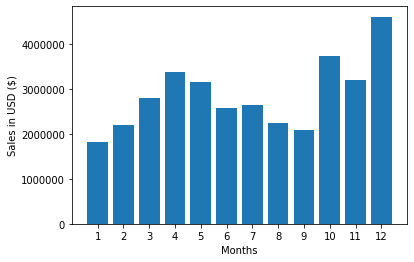

In [22]:
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months')
plt.show()

In [23]:
#Finding which city has most purchases#
#First obtaining  
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
#We are extracting the city names from purchase address#
all_data['State'] = all_data['Purchase Address'].apply(lambda y: y.split(',')[2])
#We are extracting the state names from purchase address#
all_data['City']

0               Portland
1          San Francisco
2            Los Angeles
3                Seattle
4          San Francisco
               ...      
186845       Los Angeles
186846            Austin
186847     San Francisco
186848          Portland
186849            Boston
Name: City, Length: 185950, dtype: object

In [24]:
#Removing pin code from state name#
all_data['State'] = all_data['State'].apply(lambda x: x.split(' ')[1])
all_data['State']

0         ME
1         CA
2         CA
3         WA
4         CA
          ..
186845    CA
186846    TX
186847    CA
186848    OR
186849    MA
Name: State, Length: 185950, dtype: object

In [25]:
#Adding the state name to city's#
#This command should be executed only once to ensure the states name is not added continously to city#
i = 0
while i!=1:
  all_data['City'] = all_data['City'] + ' ' + (all_data['State'])
  all_data['City']
  i=1

In [26]:
#tallying purchase made in each city#
total_purchase_city = all_data.groupby('City').sum()
total_purchase_city

,Month,Sales
City,,
Atlanta GA,104794,2.795498e+06
Austin TX,69829,1.819582e+06
Boston MA,141112,3.661642e+06
Dallas TX,104620,2.767976e+06
Los Angeles CA,208325,5.452571e+06
New York City NY,175741,4.664318e+06
Portland ME,17144,4.497583e+05
Portland OR,70621,1.870732e+06
San Francisco CA,315520,8.262204e+06


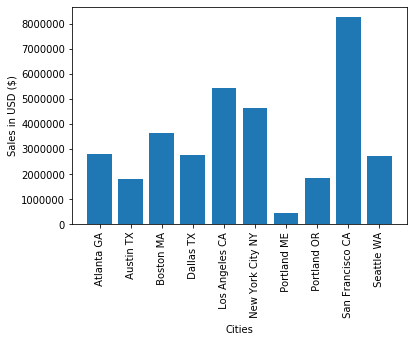

In [27]:
#Plotting result#
city = [city for city, df in all_data.groupby('City')]   #all_data['City'].unique()#  #range(len(total_purchase_city))#
plt.bar(city, total_purchase_city['Sales'])
plt.xticks(city, rotation = 'vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')
plt.show()

In [28]:
#Removing the state column from the dataframe#
all_data = all_data.drop(columns = 'State')

In [29]:
#Analysing the customer behaviour by determining the time at which max purchases are made#
#the to_datetime func helps convert all dates into a std format#
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Order Date']

0        2019-06-23 19:34:00
1        2019-06-30 10:05:00
2        2019-06-24 20:18:00
3        2019-06-05 10:21:00
4        2019-06-25 18:58:00
                 ...        
186845   2019-04-08 17:11:00
186846   2019-04-15 16:02:00
186847   2019-04-28 14:36:00
186848   2019-04-14 15:09:00
186849   2019-04-18 11:08:00
Name: Order Date, Length: 185950, dtype: datetime64[ns]

In [30]:
#obtaining individual hours and minutes from the Order Date#
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,11.950000,Portland ME,19,34
1,209922,Macbook Pro Laptop,1,1700.0,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,1700.000000,San Francisco CA,10,5
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,999.989990,Los Angeles CA,20,18
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,149.990005,Seattle WA,10,21
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,99.989998,San Francisco CA,18,58


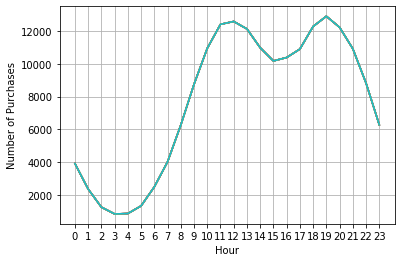

In [31]:
#Grouping the hour data#
hours = [hour for hour, df in all_data.groupby('Hour')]
#Plotting graph for number for purchase made at different hours#
plt.plot(hours, all_data.groupby(['Hour']).count())
all_data.groupby(['Hour']).count()
plt.xlabel('Hour')
plt.ylabel('Number of Purchases')
plt.xticks(hours) #Gives plot value for each hour#
plt.grid()
plt.show()

In [32]:
#Products mostly sold#
products = pd.DataFrame()
products['Product'] = all_data['Product']
products['Quantity'] = all_data['Quantity Ordered']
products

,Product,Quantity
0,USB-C Charging Cable,1
1,Macbook Pro Laptop,1
2,ThinkPad Laptop,1
3,27in FHD Monitor,1
4,Bose SoundSport Headphones,1
...,...,...
186845,Google Phone,1
186846,AA Batteries (4-pack),1
186847,AAA Batteries (4-pack),2
186848,AA Batteries (4-pack),1


In [33]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]

In [34]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
17,209938,iPhone,1,700.0,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101",6,700.00,Seattle WA,12,29
18,209938,Wired Headphones,1,11.99,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101",6,11.99,Seattle WA,12,29
29,209949,Google Phone,1,600.0,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016",6,600.00,San Francisco CA,7,45
30,209949,USB-C Charging Cable,1,11.95,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016",6,11.95,San Francisco CA,7,45
41,209960,USB-C Charging Cable,1,11.95,2019-06-22 11:53:00,"333 Sunset St, Dallas, TX 75001",6,11.95,Dallas TX,11,53


In [35]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\Admin-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
17,209938,iPhone,1,700.0,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101",6,700.00,Seattle WA,12,29,"iPhone,Wired Headphones"
18,209938,Wired Headphones,1,11.99,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101",6,11.99,Seattle WA,12,29,"iPhone,Wired Headphones"
29,209949,Google Phone,1,600.0,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016",6,600.00,San Francisco CA,7,45,"Google Phone,USB-C Charging Cable"
30,209949,USB-C Charging Cable,1,11.95,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016",6,11.95,San Francisco CA,7,45,"Google Phone,USB-C Charging Cable"
41,209960,USB-C Charging Cable,1,11.95,2019-06-22 11:53:00,"333 Sunset St, Dallas, TX 75001",6,11.95,Dallas TX,11,53,"USB-C Charging Cable,AA Batteries (4-pack)"


In [37]:
#removing duplicates of same values#
df = df[['Order ID', 'Grouped']].drop_duplicates()
df

,Order ID,Grouped
17,209938,"iPhone,Wired Headphones"
29,209949,"Google Phone,USB-C Charging Cable"
41,209960,"USB-C Charging Cable,AA Batteries (4-pack)"
43,209961,"iPhone,Lightning Charging Cable"
147,210064,"Lightning Charging Cable,27in FHD Monitor"
...,...,...
186758,194008,"AA Batteries (4-pack),Wired Headphones"
186772,194021,"Google Phone,Wired Headphones"
186802,194050,"AA Batteries (4-pack),USB-C Charging Cable"
186809,194056,"iPhone,Lightning Charging Cable"


In [38]:
from itertools import combinations
from collections import Counter

In [39]:
#Refer to the website - https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary#
#we are basically trying to figure out which products the customers buy in tandeem to provide them with any possible deals on the two iteams#
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) #By changing 2 ->3 we find out what are the trio of iteams customers purchase together to provide them with better deals#
    
print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [40]:
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [41]:
for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [42]:
#Finding out which products are sold the most#
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()
quantity_ordered

,Month,Sales,Hour,Minute
Product,,,,
20in Monitor,29336,4.541487e+05,58764,122252
27in 4K Gaming Monitor,44440,2.435098e+06,90916,184331
27in FHD Monitor,52558,1.132424e+06,107540,219948
34in Ultrawide Monitor,43304,2.355558e+06,89076,183480
AA Batteries (4-pack),145558,1.061184e+05,298342,609039
AAA Batteries (4-pack),146370,9.274083e+04,297332,612113
Apple Airpods Headphones,109477,2.349150e+06,223304,455570
Bose SoundSport Headphones,94113,1.345565e+06,192445,392603
Flatscreen TV,34224,1.445700e+06,68815,142789


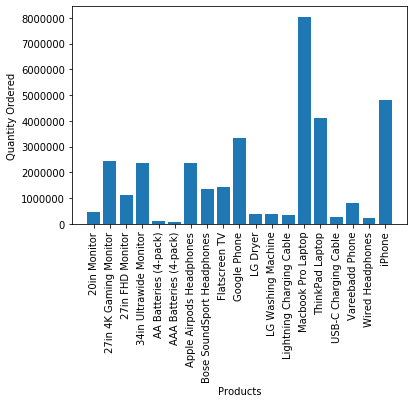

In [43]:
#Plotting the count of products sold the most#
products = [product for product, df in product_group]   
plt.bar(products, quantity_ordered['Sales'])
plt.xticks(products, rotation = 'vertical')
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.show()

In [44]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,11.950000,Portland ME,19,34
1,209922,Macbook Pro Laptop,1,1700.0,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,1700.000000,San Francisco CA,10,5
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,999.989990,Los Angeles CA,20,18
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,149.990005,Seattle WA,10,21
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,99.989998,San Francisco CA,18,58
...,...,...,...,...,...,...,...,...,...,...,...
186845,194090,Google Phone,1,600,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA,17,11
186846,194091,AA Batteries (4-pack),1,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301",4,3.840000,Austin TX,16,2
186847,194092,AAA Batteries (4-pack),2,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016",4,5.980000,San Francisco CA,14,36
186848,194093,AA Batteries (4-pack),1,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035",4,3.840000,Portland OR,15,9


In [45]:
#Finding out the price of individual products#
prices = all_data.groupby('Product').mean()['Sales']
prices

Product
20in Monitor                   110.740967
27in 4K Gaming Monitor         390.866364
27in FHD Monitor               150.849152
34in Ultrawide Monitor         381.096588
AA Batteries (4-pack)            5.157136
AAA Batteries (4-pack)           4.493040
Apple Airpods Headphones       151.080460
Bose SoundSport Headphones     100.980515
Flatscreen TV                  301.187500
Google Phone                   600.760193
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        16.026140
Macbook Pro Laptop            1701.439453
ThinkPad Laptop               1000.474487
USB-C Charging Cable            13.080457
Vareebadd Phone                400.581116
Wired Headphones                13.053618
iPhone                         700.716187
Name: Sales, dtype: float32

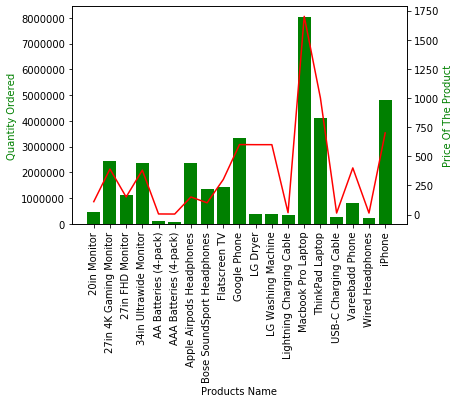

In [46]:
#Plotting the price of individual product along with sales#
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered['Sales'], color ='g') #Here we can change the color of the bars using b-blue,r-red,g-green and all other places where color has been used#
ax2.plot(products, prices, 'r-')

ax1.set_xlabel('Products Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Of The Product', color='g')
ax1.set_xticklabels(products, rotation = 'vertical')


plt.show()